In [7]:
# Decision Tree Classifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier



In [8]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

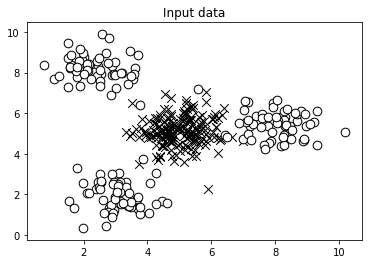

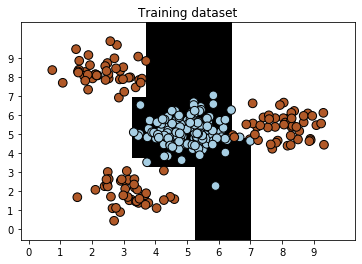

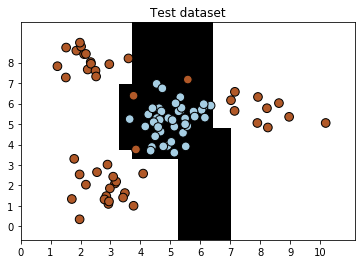


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

########################################


########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

########################################



In [9]:
# Load input data
# use 'open' to load the input_data
input_file = open("C:/Users/Peyman/Desktop/Python - Practices/data_decision_trees.txt", 'r')
data = np.loadtxt(input_file,delimiter = ',')
X,y = data[:,:-1], data[:,-1]

# Seperate input data into 2 classes based on labels (0,1); 
# The two first column of the data are data the ast column is label (0 or 1)
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# Visulaize input data
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], s=75, facecolors = 'black', edgecolors = 'black', linewidth = 1, marker = 'x')
plt.scatter(class_1[:,0], class_1[:,1], s=75, facecolors = 'white', edgecolors = 'black', linewidth = 1, marker = 'o')
plt.title('Input data')

# split data into training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)


# Decision tree classifier

params = {'random_state': 0, 'max_depth': 4} # random_state = seed = the random number generator required for intialization of the classifier. max_depth = max depth of tree that we want to construct
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

# Classify using test dataset
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

# Evaluate the Prformance of the classifier
class_names = ['Class-0', 'Class-1']
print("\n"+"#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names = class_names))
print("#"*40+"\n")

print("\n"+"#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, classifier.predict(X_test), target_names = class_names))
print("#"*40+"\n")

In [10]:
## Random Forest

import argparse

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
# since the visualize_classifier was run above, it is not repeat here
from sklearn.model_selection import train_test_split


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

In [13]:
# Argument parser
def build_arg_parser():
    parser = argparse.ArgumentParser(description = 'Classify data using Ensmble Learning techniques')
    parser.add_argument('--classifier-type', dest = 'classifier_type', required = True, choices=['rf', 'erf'], help="Type of classifier to use; can be 'rf' or 'erf'")

    return parser

# Define the main function and parse input
if __name__=='__manin__':
        
    # Parse input arguments
    args = build_arg_parser().parse_args()
    classifier_type = args.classifier_type

    # Load input data

    input_file = open("C:/Users/Peyman/Desktop/Python - Practices/data_random_forests.txt", 'r')
    data  = np.loadtxt(input_file, delimiter = ',')
    X, y = data[:,:-1], data[:,-1] # X = all data except last column, y = last culomn

    # Seperate input data into 3 classes based on labels
    class_0 = np.array(X[y==0])
    class_1 = np.array(X[y==1])
    class_2 = np.array(X[y==2])

    # Visulaize the input data
    plt.figure()
    plt.scatter(class_0[:,0], class_0[:,1], s=75, facecolors = 'white', edgecolors = 'black', linewidth=1, marker='s')
    plt.scatter(class_1[:,0], class_1[:,1], s=75, facecolors = 'white', edgecolors = 'black', linewidth=1, marker='o')
    plt.scatter(class_2[:,0], class_2[:,1], s=75, facecolors = 'white', edgecolors = 'black', linewidth=1, marker='^')
    plt.title('Input data')

    # Split data into into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # Ensemble Learning Classifier
    params = {'n_estimators':100, 'max_depth':4, 'random_state':5}
    # n_estimators = numebr of trees, max_depth = max number of levels in each tree, random_state = seed = random nuber generator needed to initialize the random forest classifier  

    if classifier_type == 'rf':
        classifier = RandomFrestClassifier(**params)
    else:
        classifier = ExtraTreesClassifier(**params)

    # Train classifier
    clasifier.fit(X_train, y_train)
    visualize_classifier(classifier, X_train, y_train, 'Training dataset')


    # Test dataset 
    y_test_pred = classifier.predict(X_test)
    visualize_classifier(classifier, X_test, y_test, 'Test dataset')

    # Evaluate the performance of the classifier
    class_names = ['class-0', 'class-1', 'class-2']
    print("\n" + "#"*40)
    print('\n Classifier performance on training set')
    print(classifier_report(y_train, classifier.predict(X_train), target_names=class_names))
    print("#"*40+"\n")
    print("#"*40)
    print('\n Classifier performance on test set')
    print(classifier_report(y_test, classifier.predict(X_test), target_names=class_names))


    # Compute confidence
    test_datapoints = np.array([[5,5],[3,6],[6,4],[7,2],[4,4],[5,2]])
    print("\n Confidence measure:")
    for datapoint in test_datapoints:
        probabilities = classifier.predict_proba([datapoint])[0]
        predicted_class = 'Class-' + str(np.argmax(probabilities))
        print('\n Datapoint: ', datapoint)
        print('\n Predicted class: ', predicted_class)

    #visulalize the datapoints
    visulalize_classifier(classifier, test_datapoints, [0]*len(test_datapoints), 'test datapoints')
    plt.show()      






In [14]:
## Dealing with class imbalance
import sys

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

# from utilities import visualize_classifier  # run this code from above

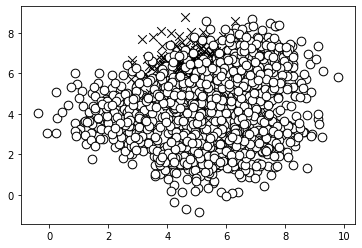

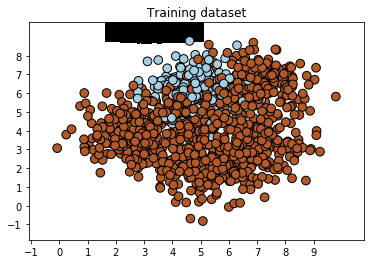

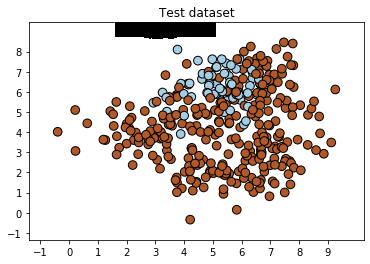


 Classifier performance on trining set: 
 
              precision    recall  f1-score   support

     Class_0       1.00      0.01      0.01       181
     Class_1       0.84      1.00      0.91       944

    accuracy                           0.84      1125
   macro avg       0.92      0.50      0.46      1125
weighted avg       0.87      0.84      0.77      1125

########################################

 Classifier performance on test set: 
 
              precision    recall  f1-score   support

     Class_0       0.00      0.00      0.00        69
     Class_1       0.82      1.00      0.90       306

    accuracy                           0.82       375
   macro avg       0.41      0.50      0.45       375
weighted avg       0.67      0.82      0.73       375



C:\Users\Peyman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
# Open data
input_file = open("C:/Users/Peyman/Desktop/Python - Practices/data_imbalance.txt",'r')
data = np.loadtxt(input_file, delimiter = ',')
X, y = data[:,:-1], data[:,-1]

#Seperate data
class_0 = np.array(X[y==0])
class_1= np.array(X[y==1])

# Visualize input data
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], s = 75, facecolors = 'black', edgecolors = 'black', linewidth = 1, marker = 'x')
plt.scatter(class_1[:,0], class_1[:,1], s = 75, facecolors = 'white', edgecolors = 'black', linewidth = 1, marker = 'o')

# Split the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

# Extremely Random Forests Classifier
params = {'n_estimators':100, 'max_depth':4, 'random_state':0}
# if len(sys.argv) > 1:
#     if sys.argv[1] == 'balance':
#         params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}
#     else:
#         raise TypeError("Invalid input argument; should be 'balance'. ")

# Build the classifier
classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

# Predict output
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, "Test dataset")

# Evaluate classifier
class_names = ['Class_0', 'Class_1']
print('\n Classifier performance on trining set: \n ')
print(classification_report(y_train, classifier.predict(X_train), target_names = class_names))

print('#'*40)

print('\n Classifier performance on test set: \n ')
print(classification_report(y_test, y_test_pred , target_names = class_names))

plt.show()







In [16]:
# Grid Search
# Identifying optimal parameter using Grid Search
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_validate  # Idon't know why this is repeated?
from sklearn.metrics import classification_report


In [17]:
# Load data
input_data = open("C:/Users/Peyman/Desktop/Python - Practices/data_random_forests.txt", 'r')
data = np.loadtxt(input_data, delimiter = ',')
X, y  = data[:,:-1], data[:,-1]

# Seperate the data into 3 classes
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])

#slpit data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
print(len(X_train))

# Define the grid params

parameter_grid = [{'n_estimators':[100], 'max_depth':[2,4,7,12,16]}, {'max_depth': [4], 'n_estimators':[25,50,100,250]}]

# Define the metrics that classifier use to find the optimized params
metrics = ['precision_weighted', 'recall_weighted']

# Test the combinations of params
for metric in metrics:
    print("\n#### Searching optimal parameters for", metric)
    classifier = GridSearchCV(ExtraTreesClassifier(random_state=0, n_estimators=100), parameter_grid, cv = 5, scoring = metric)
    classifier.fit(X_train, y_train)
    
    print("\n Grid sores for the parameter grid:")
    scores = classifier.cv_results_['mean_test_score']
    params = classifier.cv_results_['params']
    
    for (params, avg_score) in zip(params, scores) :
        print (params, '-->', round(avg_score, 3))
    
    print('\n Best paramters:', classifier.best_params_)
        
    y_pred = classifier.predict(X_test)
    print("\n Performance report:\n")
    print(classification_report(y_test, y_pred))
    
    
    
    
    

675

#### Searching optimal parameters for precision_weighted

 Grid sores for the parameter grid:
{'max_depth': 2, 'n_estimators': 100} --> 0.847
{'max_depth': 4, 'n_estimators': 100} --> 0.841
{'max_depth': 7, 'n_estimators': 100} --> 0.844
{'max_depth': 12, 'n_estimators': 100} --> 0.836
{'max_depth': 16, 'n_estimators': 100} --> 0.818
{'max_depth': 4, 'n_estimators': 25} --> 0.846
{'max_depth': 4, 'n_estimators': 50} --> 0.84
{'max_depth': 4, 'n_estimators': 100} --> 0.841
{'max_depth': 4, 'n_estimators': 250} --> 0.845

 Best paramters: {'max_depth': 2, 'n_estimators': 100}

 Performance report:

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87        79
         1.0       0.81      0.86      0.83        70
         2.0       0.83      0.91      0.87        76

    accuracy                           0.86       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.86      0.86      0.86       225


#### Sear

In [18]:
## Computing relative feature importance using AdaBoost # AdaBoost is like consulting with various people and slect the majority voted ones

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle



AdaBost Regressor
Mean squared error: 22.94
Explained variance score: 0.79


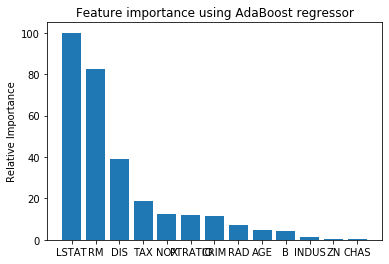

In [19]:
# Load data
housing_data = datasets.load_boston()

# Suffle data
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# split data into traing and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

#AdaBoost Regressor model
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4), n_estimators=400, random_state = 7)
regressor.fit(X_train, y_train)

# Estimate the performance of the regressor
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
ecs = explained_variance_score(y_test, y_pred)
print("AdaBost Regressor")
print("Mean squared error:", round(mse, 2))
print("Explained variance score:", round(ecs, 2))

# Extract feature importances

feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names

# Normalize the importance values
feature_importances = 100.0 * (feature_importances / max(feature_importances))

# sort the values and flip them
index_sorted = np.flipud(np.argsort(feature_importances))
# Arrange X ticks
pos = np.arange(index_sorted.shape[0]) + 0.5

# Plot bar graph
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align = 'center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()







In [20]:
## Prediciting traffic using Extrimmely Random Forest regressor

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor



In [21]:
# Open data
input_data = open('C:/Users/Peyman/Desktop/Python - Practices/traffic_data.txt', 'r')

